- Loading libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

- Loading Data

In [2]:
# Load data from the file
with open('C:/Users/gaura/BSE/MS THESIS/1_Glovo Data from Alberto/sales.pkl', 'rb') as f:
    sales_rawdata = pickle.load(f)

df_sales = pd.DataFrame(sales_rawdata)

In [3]:
# Load data from the file
with open('C:/Users/gaura/BSE/MS THESIS/1_Glovo Data from Alberto/availability.pkl', 'rb') as f:
    availability_rawdata = pickle.load(f)

df_availability = pd.DataFrame(availability_rawdata)

---

- # Sales data

In [4]:
#General Info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832608 entries, 0 to 832607
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   order_id        832608 non-null  object             
 1   store_id        832608 non-null  object             
 2   order_date      832608 non-null  object             
 3   product_id      832608 non-null  object             
 4   customer_id     832608 non-null  object             
 5   product_name    832608 non-null  object             
 6   sold_quantity   832608 non-null  float64            
 7   order_datetime  832608 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 50.8+ MB


In [5]:
#Start Date is '2022-01-01'
df_sales.order_date.min()

'2022-01-01'

In [6]:
#End Date is '2023-03-31'
df_sales.order_date.max()

'2023-03-31'

In [7]:
#Duration of Available Data is 365+90 = 455 days
len(df_sales.order_date.unique())

455

In [44]:
#Number of unique orders
len(df_sales.order_id.unique())

162819

In [9]:
#Number of unique customers
len(df_sales.customer_id.unique())

33917

In [10]:
#Number of unique products
len(df_sales.product_id.unique())

4363

In [11]:
#EDA
df_sales.head(10)

,order_id,store_id,order_date,product_id,customer_id,product_name,sold_quantity,order_datetime
0,42160,0,2022-12-31,742,15213,Listerine blanqueante 500ml,2.0,2022-12-31 17:44:04+00:00
1,17111,0,2022-12-31,3834,19259,Agua Bezoya 1.5L,2.0,2022-12-31 08:38:14+00:00
2,17111,0,2022-12-31,779,19259,Carbonell Aceite de Oliva Suave 0.4º 1L,1.0,2022-12-31 08:38:14+00:00
3,17111,0,2022-12-31,475,19259,Zumo de naranja natural 0.5L,1.0,2022-12-31 08:38:14+00:00
4,17111,0,2022-12-31,4236,19259,Evax Compresa Cottonlike Alas 16u,1.0,2022-12-31 08:38:14+00:00
5,17111,0,2022-12-31,233,19259,Ausonia Noche Compresas con Alas x9,1.0,2022-12-31 08:38:14+00:00
6,147390,0,2022-12-31,3884,21128,Matutano Fritos Tiras de Maíz Sabor Barbacoa 146g,1.0,2022-12-31 10:59:15+00:00
7,147390,0,2022-12-31,1542,21128,Président Crema de Queso Camembert 125g,1.0,2022-12-31 10:59:15+00:00
8,147390,0,2022-12-31,703,21128,Campofrio Mini Fuet Stick 50g,2.0,2022-12-31 10:59:15+00:00
9,147390,0,2022-12-31,932,21128,Bach Cava Extrisim Brut Nature 75cl 11.5º,1.0,2022-12-31 10:59:15+00:00


In [12]:
#EDA
df_sales.tail(10)

,order_id,store_id,order_date,product_id,customer_id,product_name,sold_quantity,order_datetime
832598,1997,0,2023-01-28,2532,22736,Bimbo Maxi-Burger Pan Hamburguesa 4u 300g,1.0,2023-01-28 15:07:32+00:00
832599,1997,0,2023-01-28,667,22736,Agua Font Vella 1.5L,10.0,2023-01-28 15:07:32+00:00
832600,1997,0,2023-01-28,4144,22736,Coca-Cola Zero refresco lata 33cl,8.0,2023-01-28 15:07:32+00:00
832601,1997,0,2023-01-28,602,22736,Oscar Mayer lonchas bacon 150g,1.0,2023-01-28 15:07:32+00:00
832602,1997,0,2023-01-28,2595,22736,Haribo Favoritos pica 90g,1.0,2023-01-28 15:07:32+00:00
832603,1997,0,2023-01-28,1307,22736,Papel higiénico Scottex 16u,1.0,2023-01-28 15:07:32+00:00
832604,1997,0,2023-01-28,2314,22736,Coca-Cola Light Botella 2L,6.0,2023-01-28 15:07:32+00:00
832605,32690,0,2023-01-28,3069,14236,Monster Cookie XXL de Oreo,1.0,2023-01-28 20:00:42+00:00
832606,32690,0,2023-01-28,3208,14236,Monster Cookie XXL de Nutella,1.0,2023-01-28 20:00:42+00:00
832607,32690,0,2023-01-28,1588,14236,Monster Cookie XXL de Kinder,1.0,2023-01-28 20:00:42+00:00


- Creating a copy of df_sales as df_sales_1 to drop / add columns

In [23]:
##Copy sales data to "df_sales_1"

#Remove customer_id and store_id
df_sales_1=df_sales.copy()
df_sales_1.drop(['store_id'],axis=1,inplace=True)
df_sales_1.head(10)

,order_id,order_date,product_id,customer_id,product_name,sold_quantity,order_datetime
0,42160,2022-12-31,742,15213,Listerine blanqueante 500ml,2.0,2022-12-31 17:44:04+00:00
1,17111,2022-12-31,3834,19259,Agua Bezoya 1.5L,2.0,2022-12-31 08:38:14+00:00
2,17111,2022-12-31,779,19259,Carbonell Aceite de Oliva Suave 0.4º 1L,1.0,2022-12-31 08:38:14+00:00
3,17111,2022-12-31,475,19259,Zumo de naranja natural 0.5L,1.0,2022-12-31 08:38:14+00:00
4,17111,2022-12-31,4236,19259,Evax Compresa Cottonlike Alas 16u,1.0,2022-12-31 08:38:14+00:00
5,17111,2022-12-31,233,19259,Ausonia Noche Compresas con Alas x9,1.0,2022-12-31 08:38:14+00:00
6,147390,2022-12-31,3884,21128,Matutano Fritos Tiras de Maíz Sabor Barbacoa 146g,1.0,2022-12-31 10:59:15+00:00
7,147390,2022-12-31,1542,21128,Président Crema de Queso Camembert 125g,1.0,2022-12-31 10:59:15+00:00
8,147390,2022-12-31,703,21128,Campofrio Mini Fuet Stick 50g,2.0,2022-12-31 10:59:15+00:00
9,147390,2022-12-31,932,21128,Bach Cava Extrisim Brut Nature 75cl 11.5º,1.0,2022-12-31 10:59:15+00:00


In [24]:
#Add columns date time weekday
df_sales_1["order_hour"]=df_sales_1["order_datetime"].dt.hour
df_sales_1["order_date"]=df_sales_1["order_datetime"].dt.date
df_sales_1["order_weekday"]=df_sales_1["order_datetime"].dt.weekday
df_sales_1["order_month"] = df_sales_1["order_datetime"].dt.month
df_sales_1["order_year"] = df_sales_1["order_datetime"].dt.year

In [25]:
#Remove the "order_datetime" column

df_sales_1.drop(['order_datetime'],axis=1,inplace=True)
df_sales_1.head(10)

,order_id,order_date,product_id,customer_id,product_name,sold_quantity,order_hour,order_weekday,order_month,order_year
0,42160,2022-12-31,742,15213,Listerine blanqueante 500ml,2.0,17,5,12,2022
1,17111,2022-12-31,3834,19259,Agua Bezoya 1.5L,2.0,8,5,12,2022
2,17111,2022-12-31,779,19259,Carbonell Aceite de Oliva Suave 0.4º 1L,1.0,8,5,12,2022
3,17111,2022-12-31,475,19259,Zumo de naranja natural 0.5L,1.0,8,5,12,2022
4,17111,2022-12-31,4236,19259,Evax Compresa Cottonlike Alas 16u,1.0,8,5,12,2022
5,17111,2022-12-31,233,19259,Ausonia Noche Compresas con Alas x9,1.0,8,5,12,2022
6,147390,2022-12-31,3884,21128,Matutano Fritos Tiras de Maíz Sabor Barbacoa 146g,1.0,10,5,12,2022
7,147390,2022-12-31,1542,21128,Président Crema de Queso Camembert 125g,1.0,10,5,12,2022
8,147390,2022-12-31,703,21128,Campofrio Mini Fuet Stick 50g,2.0,10,5,12,2022
9,147390,2022-12-31,932,21128,Bach Cava Extrisim Brut Nature 75cl 11.5º,1.0,10,5,12,2022


In [26]:
# Create a list of column names in the desired order
new_column_order = ['order_id','customer_id', 'product_id', 'product_name', 'sold_quantity', 'order_date', 'order_hour', 'order_weekday', 'order_month','order_year']

# Reorder the columns based on the new order
df_sales_1 = df_sales_1[new_column_order]

df_sales_1.head(10)

,order_id,customer_id,product_id,product_name,sold_quantity,order_date,order_hour,order_weekday,order_month,order_year
0,42160,15213,742,Listerine blanqueante 500ml,2.0,2022-12-31,17,5,12,2022
1,17111,19259,3834,Agua Bezoya 1.5L,2.0,2022-12-31,8,5,12,2022
2,17111,19259,779,Carbonell Aceite de Oliva Suave 0.4º 1L,1.0,2022-12-31,8,5,12,2022
3,17111,19259,475,Zumo de naranja natural 0.5L,1.0,2022-12-31,8,5,12,2022
4,17111,19259,4236,Evax Compresa Cottonlike Alas 16u,1.0,2022-12-31,8,5,12,2022
5,17111,19259,233,Ausonia Noche Compresas con Alas x9,1.0,2022-12-31,8,5,12,2022
6,147390,21128,3884,Matutano Fritos Tiras de Maíz Sabor Barbacoa 146g,1.0,2022-12-31,10,5,12,2022
7,147390,21128,1542,Président Crema de Queso Camembert 125g,1.0,2022-12-31,10,5,12,2022
8,147390,21128,703,Campofrio Mini Fuet Stick 50g,2.0,2022-12-31,10,5,12,2022
9,147390,21128,932,Bach Cava Extrisim Brut Nature 75cl 11.5º,1.0,2022-12-31,10,5,12,2022


- Creating a dataframe with columns product id and columns of total sold quantity and total number of unique order frequency

In [27]:
import pandas as pd

# Group the DataFrame by product_id
grouped_df = df_sales_1.groupby('product_id')

# Compute the total quantity sold and total number of order_ids for each product_id
total_quantity_sold = grouped_df['sold_quantity'].sum()
total_order_ids = grouped_df['order_id'].nunique()

# Create the new DataFrame
product_wise_qtysold_orderfreq_df = pd.DataFrame({
    'product_id': total_quantity_sold.index,
    'total_quantity_sold': total_quantity_sold.values,
    'total_order_ids': total_order_ids.values
})

# Write the DataFrame to a CSV file
product_wise_qtysold_orderfreq_df.to_csv('product_wise_qtysold_orderfreq_df.csv', mode='w', index=False)


- Creating a dataframe with columns product id and product name

In [28]:
# Select the 'product_id' and 'product_name' columns and drop duplicates
df_product_id_and_name = df_sales_1[['product_id', 'product_name']].drop_duplicates()

# Save the dataframe to a CSV file
df_product_id_and_name.to_csv('df_product_id_and_name.csv', index=False)


- Visualization of unique order ids vs the unique customer ids

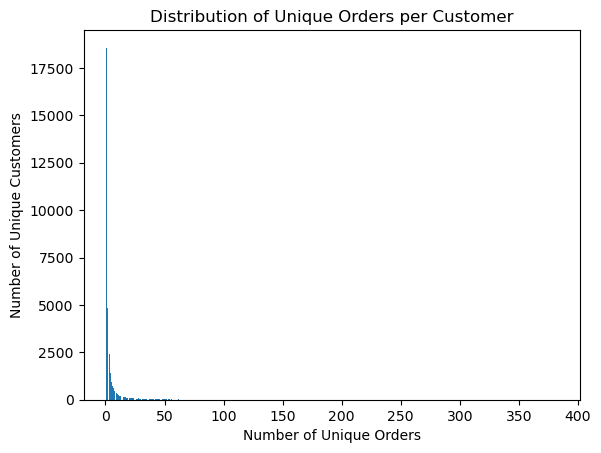

In [29]:
# Histogram
import matplotlib.pyplot as plt

# Group the DataFrame by 'customer_id' and calculate the number of unique 'order_id' for each customer
customer_order_counts = df_sales_1.groupby('customer_id')['order_id'].nunique()

# Count the frequency of unique order counts
order_count_frequency = customer_order_counts.value_counts().sort_index()

# Create a bar plot
plt.bar(order_count_frequency.index, order_count_frequency.values)

# Set the axis labels and plot title
plt.xlabel('Number of Unique Orders')
plt.ylabel('Number of Unique Customers')
plt.title('Distribution of Unique Orders per Customer')

# Display the bar plot
plt.show()
##

In [37]:
# Tabular data
# Group the DataFrame by 'customer_id' and calculate the number of unique 'order_id' for each customer
customer_order_counts = df_sales_1.groupby('customer_id')['order_id'].nunique()

# Count the frequency of unique order counts
order_count_frequency = customer_order_counts.value_counts().sort_index()

# Create a DataFrame to display the tabular output
tabular_output = pd.DataFrame({'Number of Unique Orders': order_count_frequency.index,
                               'Number of Unique Customers': order_count_frequency.values})

# Display the tabular output
tabular_output


,Number of Unique Orders,Number of Unique Customers
0,1,18563
1,2,4839
2,3,2411
3,4,1413
4,5,946
...,...,...
159,215,1
160,224,1
161,225,1
162,256,1


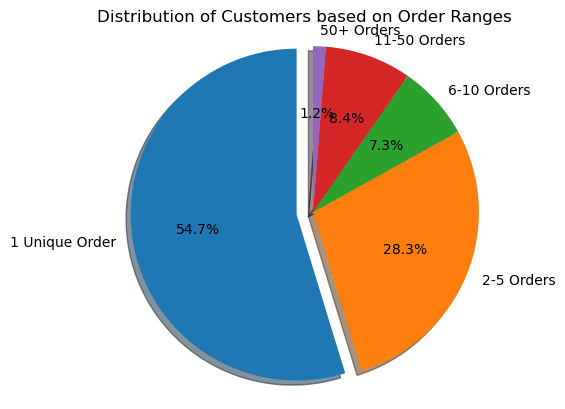

In [41]:
# Pie chart based on the Tabular data
import matplotlib.pyplot as plt

# Calculate the number of customers falling into each range
range_1 = tabular_output[tabular_output['Number of Unique Orders'] == 1]['Number of Unique Customers'].sum()
range_2_5 = tabular_output[(tabular_output['Number of Unique Orders'] >= 2) & (tabular_output['Number of Unique Orders'] <= 5)]['Number of Unique Customers'].sum()
range_6_10 = tabular_output[(tabular_output['Number of Unique Orders'] >= 6) & (tabular_output['Number of Unique Orders'] <= 10)]['Number of Unique Customers'].sum()
range_11_50 = tabular_output[(tabular_output['Number of Unique Orders'] >= 11) & (tabular_output['Number of Unique Orders'] <= 50)]['Number of Unique Customers'].sum()
range_50_plus = tabular_output[tabular_output['Number of Unique Orders'] > 50]['Number of Unique Customers'].sum()

# Create a pie chart to visualize the distribution of customers based on order ranges
labels = ['1 Unique Order', '2-5 Orders', '6-10 Orders', '11-50 Orders', '50+ Orders']
sizes = [range_1, range_2_5, range_6_10, range_11_50, range_50_plus]
explode = [0.1, 0, 0, 0, 0]  # explode the "1 Unique Order" slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Set the plot title
plt.title('Distribution of Customers based on Order Ranges')

# Display the pie chart
plt.show()


- Visualization of Number of Orders with the number of products they contain

In [47]:
import pandas as pd

# Create a copy of the original dataframe
df_copy_tabular = df_sales_1.copy()

# Group the copied dataframe by 'order_id' and count the number of unique 'product_id' values for each order
grouped_df_tabular = df_copy_tabular.groupby('order_id')['product_id'].nunique().reset_index()

# Rename the column for clarity
grouped_df_tabular = grouped_df_tabular.rename(columns={'product_id': 'number_of_product_id'})

# Sort the dataframe by 'number_of_product_id'
grouped_df_tabular = grouped_df_tabular.sort_values('number_of_product_id', ascending=False)

# Display the resulting dataframe
grouped_df_tabular


,order_id,number_of_product_id
51010,145906,61
56663,150994,54
91676,3597,54
20933,118837,51
78006,23666,50
...,...,...
142816,81996,1
37938,134140,1
142813,81993,1
37939,134141,1


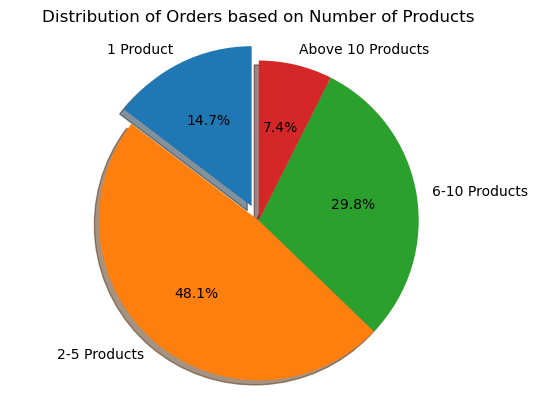

In [55]:
import matplotlib.pyplot as plt

# Calculate the number of orders falling into each range
range_1 = grouped_df_tabular[grouped_df_tabular['number_of_product_id'] == 1]['order_id'].count()
range_2_5 = grouped_df_tabular[(grouped_df_tabular['number_of_product_id'] >= 2) & (grouped_df_tabular['number_of_product_id'] <= 5)]['order_id'].count()
range_6_10 = grouped_df_tabular[(grouped_df_tabular['number_of_product_id'] >= 6) & (grouped_df_tabular['number_of_product_id'] <= 10)]['order_id'].count()
#range_11_20 = grouped_df_tabular[(grouped_df_tabular['number_of_product_id'] >= 11) & (grouped_df_tabular['number_of_product_id'] <= 20)]['order_id'].count()
#range_21_30 = grouped_df_tabular[(grouped_df_tabular['number_of_product_id'] >= 21) & (grouped_df_tabular['number_of_product_id'] <= 30)]['order_id'].count()
#range_31_40 = grouped_df_tabular[(grouped_df_tabular['number_of_product_id'] >= 31) & (grouped_df_tabular['number_of_product_id'] <= 40)]['order_id'].count()
range_above_10 = grouped_df_tabular[grouped_df_tabular['number_of_product_id'] > 10]['order_id'].count()

# Create a pie chart to visualize the distribution of orders based on the number of products
labels = ['1 Product', '2-5 Products', '6-10 Products', 'Above 10 Products']
sizes = [range_1, range_2_5, range_6_10, range_above_10]
explode = [0.1, 0, 0, 0]  # explode the "1 Product" slice

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Set the plot title
plt.title('Distribution of Orders based on Number of Products')

# Display the pie chart
plt.show()


- Visualization of  Total Number of unique orders across months

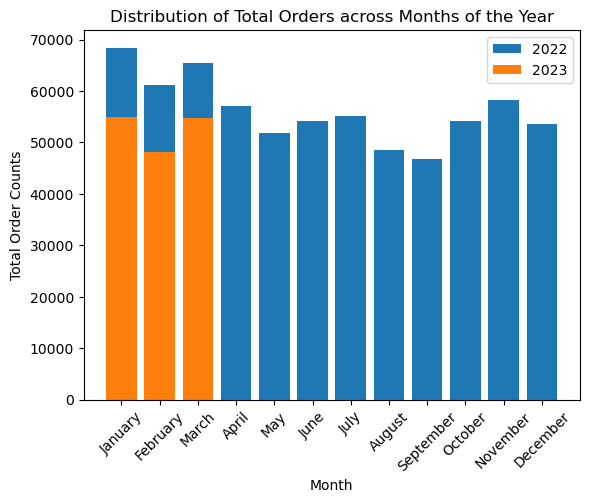

In [21]:
import matplotlib.pyplot as plt

# Create a DataFrame with all months and set the 'order_year' column to 2022
df_months_2022 = pd.DataFrame({'order_month': range(1, 13)})
df_months_2022['order_year'] = 2022

# Create a filtered dataframe from df_sales_1 corresponding to order_year=2022
df_sales_2022 = df_sales_1[df_sales_1['order_year'] == 2022].copy()


# Merge the month DataFrame with the original DataFrame for 2022
df_sales_2022_merged = df_months_2022.merge(df_sales_2022, on=['order_month', 'order_year'], how='left')

# Group the merged DataFrame by 'order_month' and calculate the total number of order IDs for each month in 2022
order_month_counts_2022 = df_sales_2022_merged.groupby('order_month')['order_id'].count()

# Create a DataFrame with all months and set the 'order_year' column to 2023
df_months_2023 = pd.DataFrame({'order_month': range(1, 13)})
df_months_2023['order_year'] = 2023

# Create a filtered dataframe from df_sales_1 corresponding to order_year=2023
df_sales_2023 = df_sales_1[df_sales_1['order_year'] == 2023].copy()

# Merge the month DataFrame with the original DataFrame for 2023
df_sales_2023_merged = df_months_2023.merge(df_sales_2023, on=['order_month', 'order_year'], how='left')

# Group the merged DataFrame by 'order_month' and calculate the total number of order IDs for each month in 2023
order_month_counts_2023 = df_sales_2023_merged.groupby('order_month')['order_id'].count()

# Specify the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create two bar plots for 2022 and 2023
plt.bar(month_order, order_month_counts_2022, label='2022')
plt.bar(month_order, order_month_counts_2023, label='2023')

# Set the axis labels and plot title
plt.xlabel('Month')
plt.ylabel('Total Order Counts')
plt.title('Distribution of Total Orders across Months of the Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the bar plot
plt.show()



- Visualization of Total Number of unique orders across weekdays

order_weekday
0    0.131287
1    0.124396
2    0.122080
3    0.123610
4    0.147538
5    0.165368
6    0.185722
Name: order_id, dtype: float64


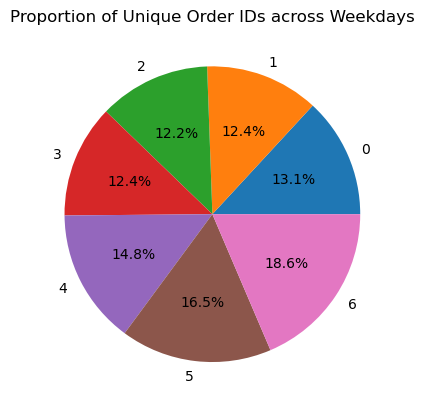

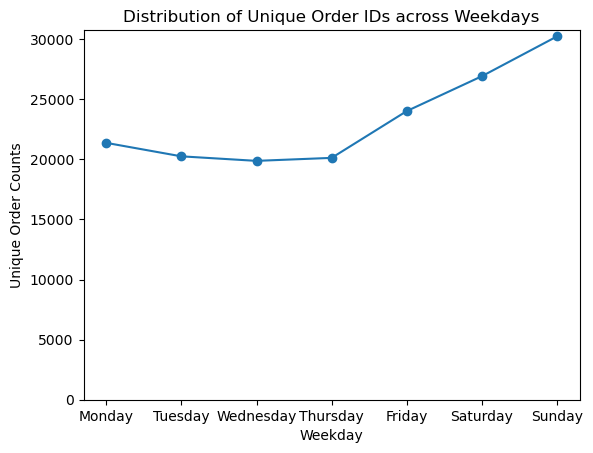

In [20]:
##EDA

##Order distribution across weekdays

#Total Number of unique orders across weekdays

# Assuming you have a DataFrame called 'df_sales_1' with the required columns

# Calculate the total number of unique order IDs
total_unique_orders = df_sales_1['order_id'].nunique()

# Group the DataFrame by 'order_weekday' and calculate the number of unique order IDs for each weekday
weekday_counts = df_sales_1.groupby('order_weekday')['order_id'].nunique()

# Calculate the proportion of unique order IDs for each weekday
proportions = weekday_counts / total_unique_orders

# Display the proportions
print(proportions)

# Specify the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pie chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Proportion of Unique Order IDs across Weekdays')

# Display the pie chart
plt.show()

# Specify the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(weekday_order, weekday_counts, marker='o')

# Set the axis labels and plot title
plt.xlabel('Weekday')
plt.ylabel('Unique Order Counts')
plt.title('Distribution of Unique Order IDs across Weekdays')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Display the line plot
plt.show()

- Visualization of  Total Number of unique orders across hours of day

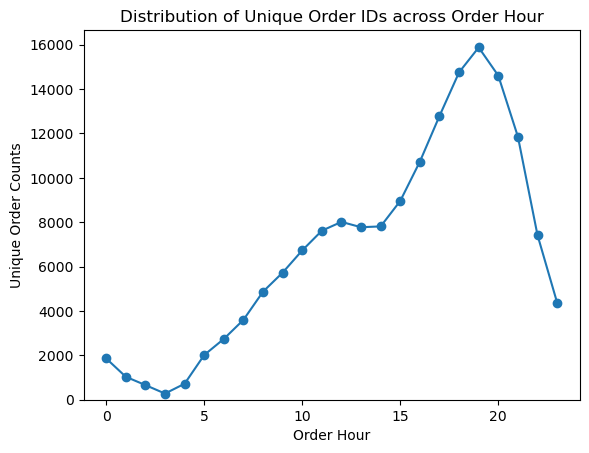

In [45]:
## EDA

##Order distribution across hours of day

#Total Number of unique orders across hours of day

# Group the DataFrame by 'order_hour' and calculate the number of unique order IDs for each order time
order_hour_counts = df_sales_1.groupby('order_hour')['order_id'].nunique()

# Specify the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot
plt.plot(order_hour_counts.index, order_hour_counts.values, marker='o')

# Set the axis labels and plot title
plt.xlabel('Order Hour')
plt.ylabel('Unique Order Counts')
plt.title('Distribution of Unique Order IDs across Order Hour')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Display the line plot
plt.show()



- Visualization of  Total Sold Quantity of the highest selling product (by quantity sold) across weekdays and hours of day

The highest selling product_id is: 1280


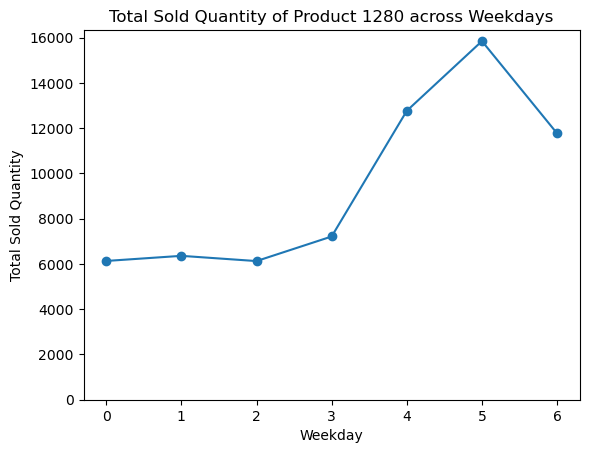

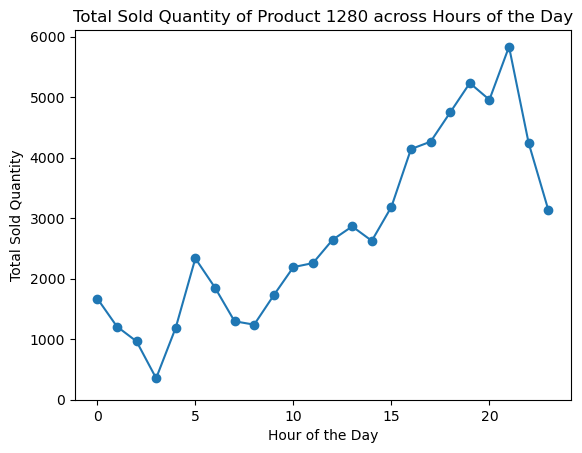

In [52]:
##EDA

##Order distribution of highest_selling_product_id across weekdays and across hours

# Group the DataFrame by 'product_id' and calculate the sum of 'sold_quantity' for each product
product_sales = df_sales_1.groupby('product_id')['sold_quantity'].sum()

# Find the product_id with the highest sold_quantity
highest_selling_product_id = product_sales.idxmax()

# Display the highest selling product_id
print(f"The highest selling product_id is: {highest_selling_product_id}")

# Filter the DataFrame for a specific product_id
product_id = highest_selling_product_id
product_df = df_sales_1[df_sales_1['product_id'] == product_id]

# Group the filtered DataFrame by 'order_weekday' and calculate the sum of 'sold_quantity' for each hour
hourly_sold_quantity = product_df.groupby('order_weekday')['sold_quantity'].sum()

# Create a line plot
plt.plot(hourly_sold_quantity.index, hourly_sold_quantity.values, marker='o')

# Set the axis labels and plot title
plt.xlabel('Weekday')
plt.ylabel('Total Sold Quantity')
plt.title(f'Total Sold Quantity of Product {product_id} across Weekdays')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Display the line plot
plt.show()

# Group the filtered DataFrame by 'order-hour' and calculate the sum of 'sold_quantity' for each hour
hourly_sold_quantity = product_df.groupby('order_hour')['sold_quantity'].sum()

# Create a line plot
plt.plot(hourly_sold_quantity.index, hourly_sold_quantity.values, marker='o')

# Set the axis labels and plot title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sold Quantity')
plt.title(f'Total Sold Quantity of Product {product_id} across Hours of the Day')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Display the line plot
plt.show()




- Visualization of Total Sold Quantity of top 10 selling products across weekdays

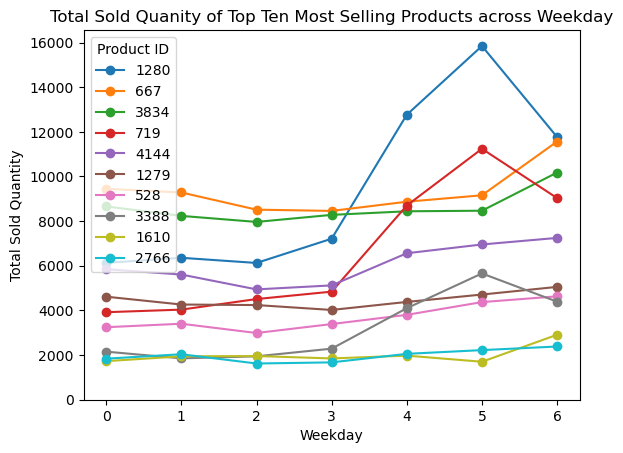

In [53]:
##EDA

##Order distribution of top 10 selling_product_id across weekdays and across hours

# Group the DataFrame by 'product_id' and calculate the sum of 'sold_quantity' for each product
product_sales = df_sales_1.groupby('product_id')['sold_quantity'].sum()

# Find the top ten most selling product IDs
top_ten_product_ids = product_sales.nlargest(10).index

# Group the DataFrame by 'product_id' and calculate the sum of 'sold_quantity' for each product
product_sales = df_sales_1.groupby('product_id')['sold_quantity'].sum()

# Find the top ten most selling product IDs
top_ten_product_ids = product_sales.nlargest(10).index

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Generate a unique color for each line plot
colors = plt.cm.tab10(np.linspace(0, 1, len(top_ten_product_ids)))

# Plot line plots for the top ten product IDs
for i, product_id in enumerate(top_ten_product_ids):
    # Filter the DataFrame for the current product_id
    product_df = df_sales_1[df_sales_1['product_id'] == product_id]

    # Group the filtered DataFrame by 'order_hour' and calculate the sum of 'sold_quantity' for each hour
    weekday_sold_quantity = product_df.groupby('order_weekday')['sold_quantity'].sum()

    # Get the corresponding color for the current line plot
    color = colors[i]

    # Plot the line plot for the current product_id with the corresponding color
    ax.plot(weekday_sold_quantity.index, weekday_sold_quantity.values, marker='o', color=color, label=product_id)

# Set the axis labels and plot title
plt.xlabel('Weekday')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quanity of Top Ten Most Selling Products across Weekday')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Add a legend to differentiate the line plots
ax.legend(title='Product ID')

# Display the plot
plt.show()


- Visualization of Total Quantity sold of top 10 selling products(by quantity sold) across hours of day

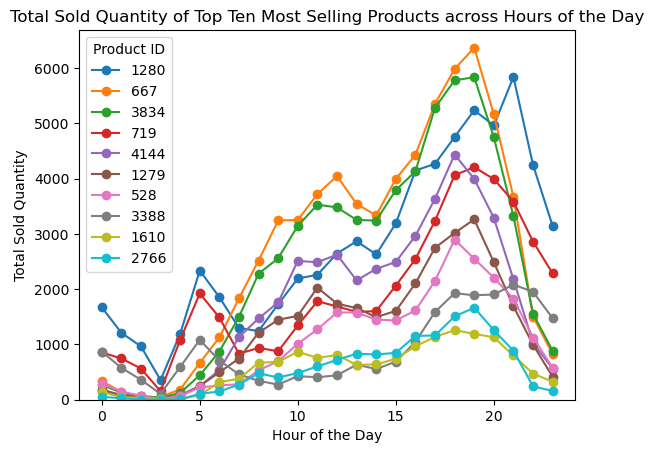

In [54]:

##EDA

##Order distribution of top 10 selling_product_id across across hours of day

# Group the DataFrame by 'product_id' and calculate the sum of 'sold_quantity' for each product
product_sales = df_sales_1.groupby('product_id')['sold_quantity'].sum()

# Find the top ten most selling product IDs
top_ten_product_ids = product_sales.nlargest(10).index

# Group the DataFrame by 'product_id' and calculate the sum of 'sold_quantity' for each product
product_sales = df_sales_1.groupby('product_id')['sold_quantity'].sum()

# Find the top ten most selling product IDs
top_ten_product_ids = product_sales.nlargest(10).index

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Generate a unique color for each line plot
colors = plt.cm.tab10(np.linspace(0, 1, len(top_ten_product_ids)))
# Plot line plots for the top ten product IDs
for i, product_id in enumerate(top_ten_product_ids):
    # Filter the DataFrame for the current product_id
    product_df = df_sales_1[df_sales_1['product_id'] == product_id]

    # Group the filtered DataFrame by 'order_hour' and calculate the sum of 'sold_quantity' for each hour
    hourly_sold_quantity = product_df.groupby('order_hour')['sold_quantity'].sum()

    # Get the corresponding color for the current line plot
    color = colors[i]

    # Plot the line plot for the current product_id with the corresponding color
    ax.plot(hourly_sold_quantity.index, hourly_sold_quantity.values, marker='o', color=color, label=product_id)

# Set the axis labels and plot title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity of Top Ten Most Selling Products across Hours of the Day')

# Set the y-axis limit to start from 0
plt.ylim(0, None)

# Add a legend to differentiate the line plots
ax.legend(title='Product ID')

# Display the plot
plt.show()


- Visualization of Top 20 Products by Sold Quantiy

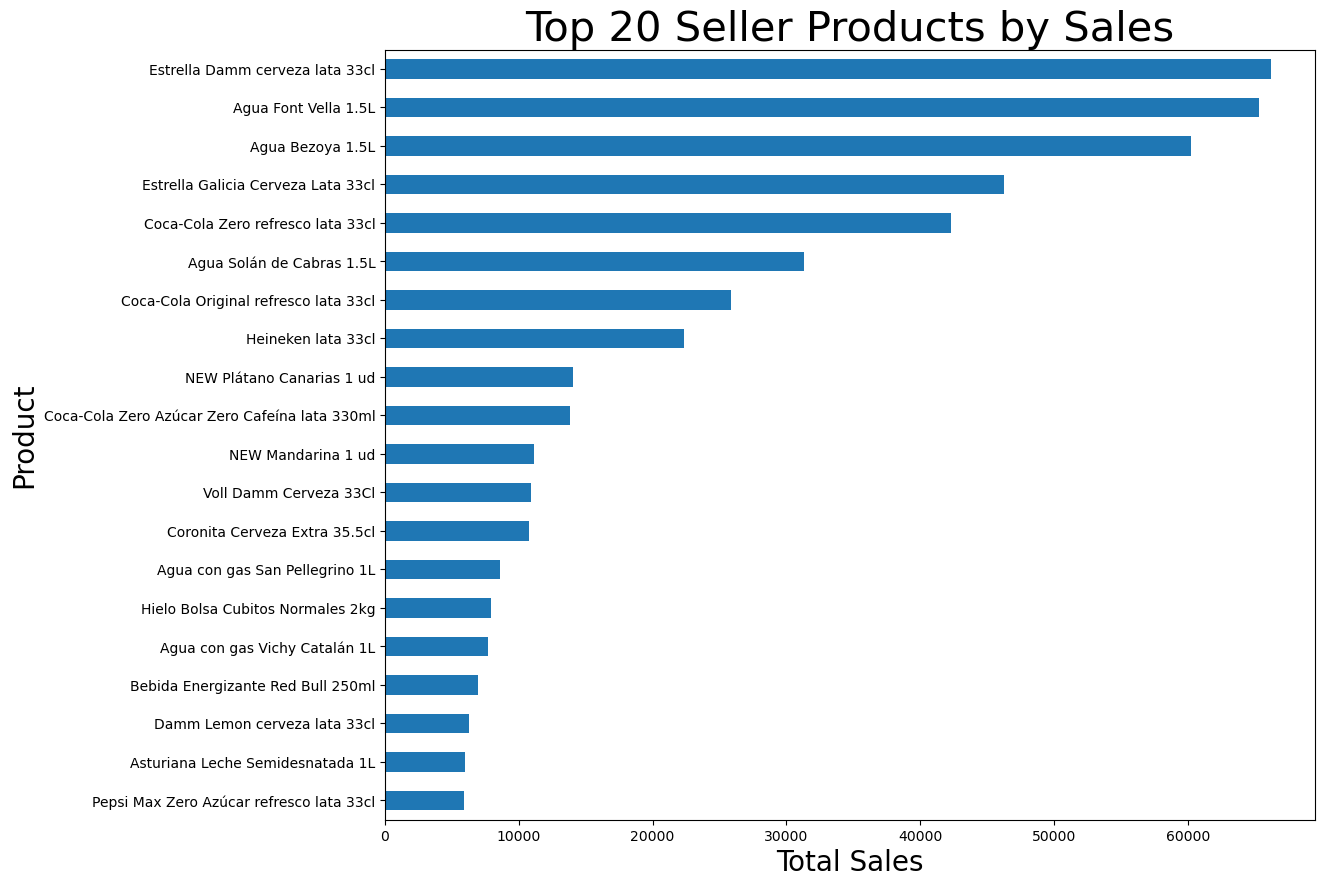

In [59]:
plt.figure(figsize=(12, 10))

df_sales.groupby('product_name')['sold_quantity'].sum().nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Total Sales',size=20)
plt.ylabel('Product',size=20)
plt.title('Top 20 Seller Products by Sales',size=30)

# Show the plot
plt.show()

- Visualization of Top 20 Products by Order Frequency

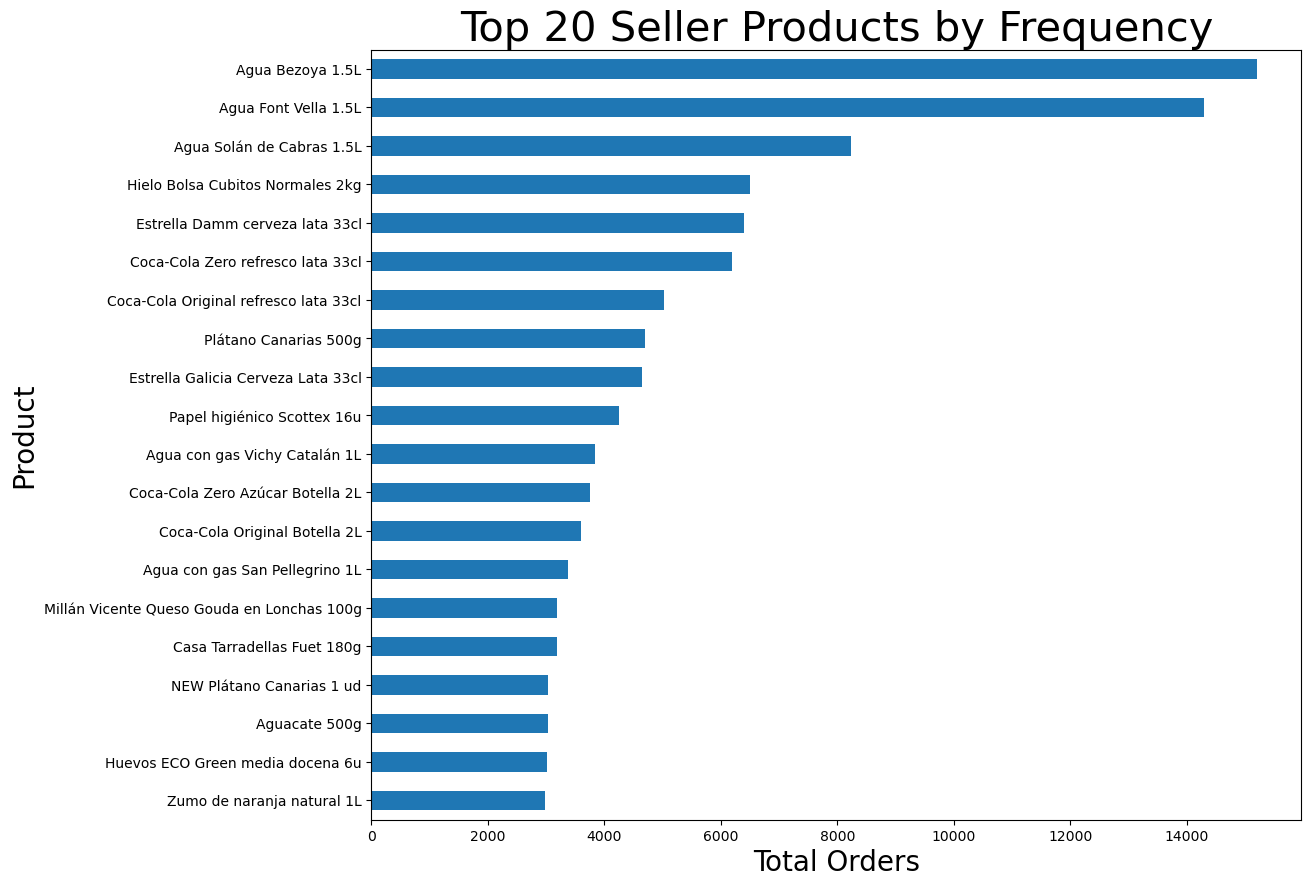

In [60]:
plt.figure(figsize=(12, 10))

df_sales.groupby('product_name').size().nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.xlabel('Total Orders',size=20)
plt.ylabel('Product',size=20)
plt.title('Top 20 Seller Products by Frequency',size=30)

# Show the plot
plt.show()

---

- # Stock Availability data

In [4]:
#General Info
df_availability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983800 entries, 0 to 1983799
Data columns (total 4 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   store_id                 int64 
 1   product_id               int64 
 2   order_date               object
 3   available_as_end_of_day  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 47.3+ MB


In [5]:
# Availability data is for all the corresponding 455 days
len(df_availability.order_date.unique())

455

In [6]:
#Number of unique products
len(df_sales.product_id.unique())

4363

In [7]:
df_availability.head(10)

,store_id,product_id,order_date,available_as_end_of_day
0,0,687,2023-02-16,False
1,0,3176,2022-01-02,True
2,0,1850,2022-01-02,False
3,0,2351,2022-01-02,False
4,0,2674,2022-01-02,False
5,0,1586,2022-01-02,False
6,0,324,2022-01-02,True
7,0,3680,2022-01-02,False
8,0,3767,2022-01-02,True
9,0,1914,2022-01-02,True


- Each day we have stock - availability statuts of 4360 products
    Why are 3 products missing?

In [8]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'order_date' and calculate the number of unique product IDs
unique_product_counts = df_availability.groupby('order_date')['product_id'].nunique()

print(unique_product_counts)

order_date
2022-01-01    4360
2022-01-02    4360
2022-01-03    4360
2022-01-04    4360
2022-01-05    4360
              ... 
2023-03-27    4360
2023-03-28    4360
2023-03-29    4360
2023-03-30    4360
2023-03-31    4360
Name: product_id, Length: 455, dtype: int64


- The 3 missing products.

In [10]:
import pandas as pd

# Group the data by order date
grouped_data = df_availability.groupby('order_date')

# Initialize an empty dictionary to store the missing product IDs for each date
missing_product_ids = {}

# Iterate over each group
for date, group in grouped_data:
    # Create a set of all product IDs for the current date
    available_product_ids = set(group['product_id'])
    
    # Create a set of all possible product IDs (range from 0 to 4362)
    all_product_ids = set(range(4362))
    
    # Find the missing product IDs by taking the difference between all_product_ids and available_product_ids
    missing_ids = all_product_ids - available_product_ids
    
    # Store the missing product IDs in the dictionary with the date as the key
    missing_product_ids[date] = missing_ids

# Print the missing product IDs for each date
for date, missing_ids in missing_product_ids.items():
    print(f"Missing product IDs for {date}: {missing_ids}")


Missing product IDs for 2022-01-01: {3195, 1364, 71}
Missing product IDs for 2022-01-02: {3195, 1364, 71}
Missing product IDs for 2022-01-03: {3195, 1364, 71}
Missing product IDs for 2022-01-04: {3195, 1364, 71}
Missing product IDs for 2022-01-05: {3195, 1364, 71}
Missing product IDs for 2022-01-06: {3195, 1364, 71}
Missing product IDs for 2022-01-07: {3195, 1364, 71}
Missing product IDs for 2022-01-08: {3195, 1364, 71}
Missing product IDs for 2022-01-09: {3195, 1364, 71}
Missing product IDs for 2022-01-10: {3195, 1364, 71}
Missing product IDs for 2022-01-11: {3195, 1364, 71}
Missing product IDs for 2022-01-12: {3195, 1364, 71}
Missing product IDs for 2022-01-13: {3195, 1364, 71}
Missing product IDs for 2022-01-14: {3195, 1364, 71}
Missing product IDs for 2022-01-15: {3195, 1364, 71}
Missing product IDs for 2022-01-16: {3195, 1364, 71}
Missing product IDs for 2022-01-17: {3195, 1364, 71}
Missing product IDs for 2022-01-18: {3195, 1364, 71}
Missing product IDs for 2022-01-19: {3195, 136

- Visualization of Percentage of Products Available by date

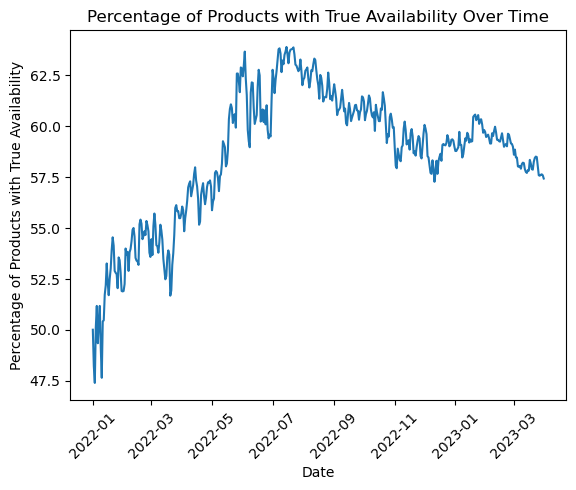

In [11]:
import matplotlib.pyplot as plt

# Calculate the percentage of products with False value in available_as_end_of_day column for each date
availability_percentage = df_availability.groupby('order_date')['available_as_end_of_day'].mean() * 100

# Create a line plot
plt.plot(availability_percentage.index, availability_percentage.values)

# Set the axis labels and plot title
plt.xlabel('Date')
plt.ylabel('Percentage of Products with True Availability')
plt.title('Percentage of Products with True Availability Over Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the line plot
plt.show()


- Product Wise Number of Stock Out days : df_product_wise_stock_out_days

In [12]:
# Calculate the number of stock-out days for each product ID
product_wise_stock_out_days = df_availability.groupby('product_id')['available_as_end_of_day'].apply(lambda x: (~x).sum())

# Sort the stock-out days in descending order
product_wise_stock_out_days_sorted = product_wise_stock_out_days.sort_values(ascending=False)

# Convert the Series to a DataFrame
df_product_wise_stock_out_days = product_wise_stock_out_days_sorted.to_frame().reset_index()

# Rename the columns
df_product_wise_stock_out_days.columns = ['product_id', 'number_of_stock_out_days']

# Display the DataFrame
print(df_product_wise_stock_out_days)



      product_id  number_of_stock_out_days
0           4027                       455
1           3184                       455
2           1174                       455
3           3850                       455
4            576                       455
...          ...                       ...
4355         915                         0
4356        2287                         0
4357        3422                         0
4358        2282                         0
4359        3728                         0

[4360 rows x 2 columns]


- Number of Products corresponding to Number of Stock out days : df_stock_out_days

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of stock out days for each product ID
stock_out_days = df_availability.groupby('product_id')['available_as_end_of_day'].apply(lambda x: (~x).sum())

# Count the number of products for each stock out days value
stock_out_days_counts = stock_out_days.value_counts().sort_index()

# Convert the Series to a DataFrame
df_stock_out_days = stock_out_days_counts.reset_index()

# Rename the columns
df_stock_out_days.columns = ['Number of stock out days', 'Number of products']


# Calculate the total number of products
total_products = df_stock_out_days['Number of products'].sum()

# Calculate the percentage of the number of products
df_stock_out_days['Percentage of Number of products'] = df_stock_out_days['Number of products'] / total_products * 100

# Calculate the cumulative percentage
df_stock_out_days['Cumulative Percentage'] = df_stock_out_days['Percentage of Number of products'].cumsum()

# Display the DataFrame
df_stock_out_days


,Number of stock out days,Number of products,Percentage of Number of products,Cumulative Percentage
0,0,342,7.844037,7.844037
1,1,64,1.467890,9.311927
2,2,77,1.766055,11.077982
3,3,77,1.766055,12.844037
4,4,80,1.834862,14.678899
...,...,...,...,...
451,451,11,0.252294,90.825688
452,452,10,0.229358,91.055046
453,453,10,0.229358,91.284404
454,454,3,0.068807,91.353211


- Plot 

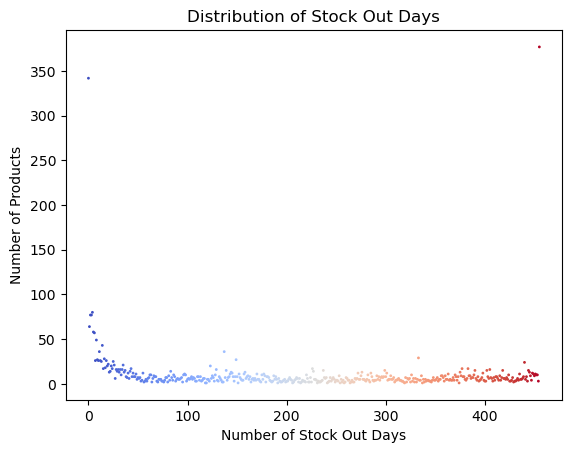

In [17]:
import numpy as np

# Set the size and transparency of the bubbles
bubble_size = 1
alpha_value = 1

# Create a color gradient based on the number of stock out days
colors = df_stock_out_days['Number of stock out days']
normalized_colors = (colors - min(colors)) / (max(colors) - min(colors))
color_map = plt.cm.get_cmap('coolwarm')
bubble_colors = color_map(normalized_colors)

# Create a scatter plot with color gradient
plt.scatter(df_stock_out_days['Number of stock out days'],
            df_stock_out_days['Number of products'],
            s=bubble_size,
            alpha=alpha_value,
            c=bubble_colors)

# Set the axis labels and plot title
plt.xlabel('Number of Stock Out Days')
plt.ylabel('Number of Products')
plt.title('Distribution of Stock Out Days')

# Display the plot
plt.show()


- Plot: exclude zero stock out days and stock out days above 400

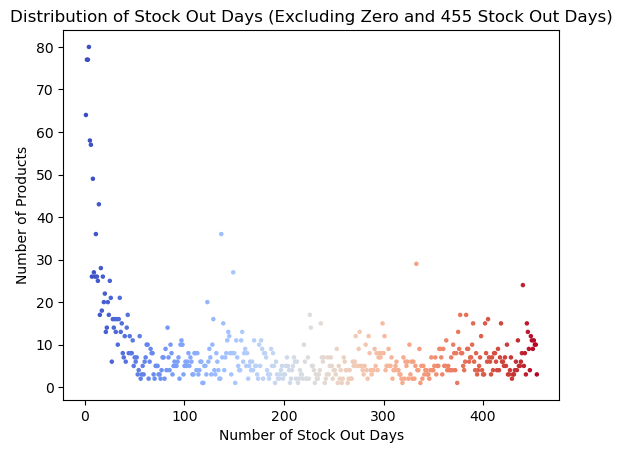

In [18]:
import numpy as np

# Filter the DataFrame to exclude zero stock out days and stock out of 455 days
filtered_stock_out_days = df_stock_out_days[
    (df_stock_out_days['Number of stock out days'] > 0) & (df_stock_out_days['Number of stock out days'] < 455)
]

# Set the size and transparency of the bubbles
bubble_size = 5
alpha_value = 1

# Create a color gradient based on the filtered stock out days
colors = filtered_stock_out_days['Number of stock out days']
normalized_colors = (colors - min(colors)) / (max(colors) - min(colors))
color_map = plt.cm.get_cmap('coolwarm')
bubble_colors = color_map(normalized_colors)

# Create a scatter plot with color gradient
plt.scatter(filtered_stock_out_days['Number of stock out days'],
            filtered_stock_out_days['Number of products'],
            s=bubble_size,
            alpha=alpha_value,
            c=bubble_colors)

# Set the axis labels and plot title
plt.xlabel('Number of Stock Out Days')
plt.ylabel('Number of Products')
plt.title('Distribution of Stock Out Days (Excluding Zero and 455 Stock Out Days)')

# Display the plot
plt.show()


---